## RECCURENT NEURAL NETWORK
* Run the code below to import the dataset
* 1) Get the images and labels for train and test from the dataset. Define the hyparameters (can define after)
* 2) Reshape the data so that the vectors of pixels become square arrays. Display the shape of traning images
* 3) Display the shape of the images' labels
* 4) Define the input and output of RNNs architecture
* 5) Define the RNNs model to classify images. The simple RNN layer will take a sequence of columns in an image array as inputs. (We may add some more layer or use a special type of RNN like LSTM)
* 6) Define the loss and the prediction of the model
* 7) Train the model and display the test loss and test accuracy

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

mnist = input_data.read_data_sets('./mnist', one_hot=True)              # they has been normalized to range (0,1)


Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [0]:
# Get the test
X_test = mnist.test.images
y_test = mnist.test.labels
# Proceed similarly with the train
X_train = mnist.train.images
y_train = mnist.train.labels

# hyperparameters
n_neurons = 512 #n_steps*n_inputs     #512
learning_rate = 0.01
batch_size = 1000 #128
n_epochs = 16
num_examples = X_train.shape[0]
index_in_epoch = 0
n_iterations = num_examples//batch_size

In [0]:
# parameters
n_steps = 28 # 28 rows
n_inputs = 28 # 28 cols
n_outputs = 10 # 10 classes

In [0]:
# Reshape the data so that the vectors of pixels become square arrays. Display the shape of training images
# Display the shape of the images' labels

X_train = X_train.reshape((X_train.shape[0], n_steps, n_inputs))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_inputs))

print("X_train shape : ", X_train.shape)     # (55000, 28 * 28)
print("y_train shape : ", y_train.shape)   # (55000, 10)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (55000, 28, 28)
y_train shape :  (55000, 10)
X_test shape :  (10000, 28, 28)
y_test shape :  (10000, 10)


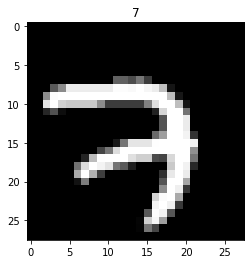

In [0]:
plt.imshow(X_train[0], cmap='gray')
plt.title('%i' % np.argmax(y_train[0]))
plt.show()

In [0]:
# Define input and output of RNNs architecture
X = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None, n_outputs))

In [0]:
def next_batch(batch_size, data, labels):
    global num_examples
    global index_in_epoch
    start = index_in_epoch
    index_in_epoch += batch_size
    if index_in_epoch > num_examples:
        start = 0
        index_in_epoch = batch_size
    end = index_in_epoch
    return data[start:end], labels[start:end]

In [0]:
# Define your model

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_inputs) #take a sequence of columns in an image array as inputs BasicLSTM
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)
output = tf.layers.dense(states, n_outputs, )

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
# Define the loss and prediction

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=output))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output, 1), tf.argmax(y, 1)), tf.float32))

In [0]:
# initialize the variables
init = tf.global_variables_initializer()

# train the model
with tf.Session() as sess:
    init.run()
    for epoch in range(1,n_epochs+1):
        
        # ============= Training Dataset ============
        for i in range(n_iterations):
            batch_X, batch_y = next_batch(batch_size, X_train, y_train)
            feed_dictionary = {X : batch_X, y : batch_y}
            optimizer.run(feed_dict=feed_dictionary)

        #print("output : ", output.eval(feed_dict={X: batch_X}))
        #print("states : ", states.eval(feed_dict={X: batch_X}))
        training_accuracy = sess.run(accuracy, feed_dict=feed_dictionary)
        print(f'Epoch {epoch} \t| Training Accuracy = {training_accuracy}')
        
        # ========== Test Dataset =============
        test_acc = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
        print(f'Epoch {epoch} \t| Testing Accuracy = {test_acc}')

Epoch 1 	| Training Accuracy = 0.6499999761581421
Epoch 1 	| Testing Accuracy = 0.614300012588501
Epoch 2 	| Training Accuracy = 0.7250000238418579
Epoch 2 	| Testing Accuracy = 0.6915000081062317
Epoch 3 	| Training Accuracy = 0.7749999761581421
Epoch 3 	| Testing Accuracy = 0.7473999857902527
Epoch 4 	| Training Accuracy = 0.8130000233650208
Epoch 4 	| Testing Accuracy = 0.7822999954223633
Epoch 5 	| Training Accuracy = 0.8119999766349792
Epoch 5 	| Testing Accuracy = 0.7976999878883362
Epoch 6 	| Training Accuracy = 0.8450000286102295
Epoch 6 	| Testing Accuracy = 0.8271999955177307
Epoch 7 	| Training Accuracy = 0.8610000014305115
Epoch 7 	| Testing Accuracy = 0.8499000072479248
Epoch 8 	| Training Accuracy = 0.8790000081062317
Epoch 8 	| Testing Accuracy = 0.8632000088691711
Epoch 9 	| Training Accuracy = 0.8859999775886536
Epoch 9 	| Testing Accuracy = 0.8866000175476074
Epoch 10 	| Training Accuracy = 0.8830000162124634
Epoch 10 	| Testing Accuracy = 0.8877999782562256
Epoch 11 